In [9]:
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)

In [10]:
from PIL import Image
im=Image.open('cropped_Wild041.tif')
width, height=im.size

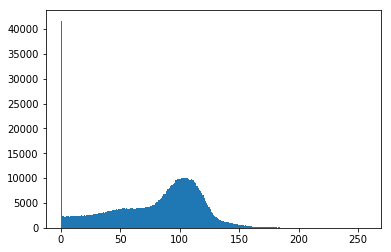

77.60148053093343

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild041.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

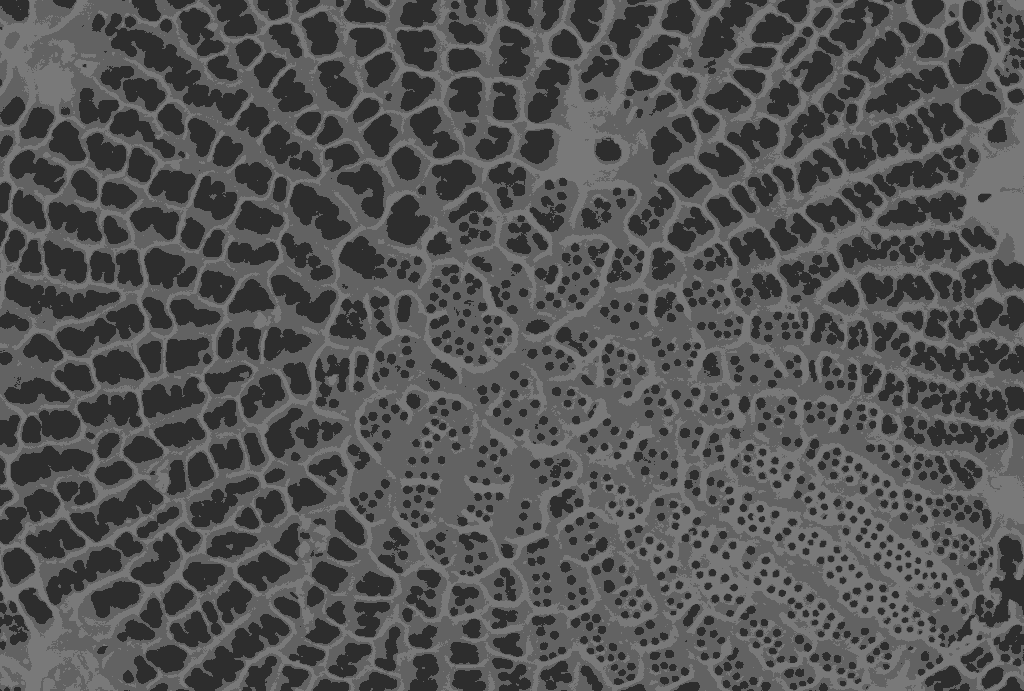

In [12]:
im.quantize(3,0)

<PIL.Image.Image image mode=P size=1024x691 at 0x118244080>


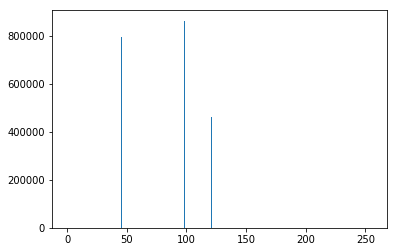

[[[ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]
  ...
  [121 121 121]
  [121 121 121]
  [121 121 121]]

 [[ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]
  ...
  [121 121 121]
  [121 121 121]
  [121 121 121]]

 [[ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]
  ...
  [121 121 121]
  [121 121 121]
  [121 121 121]]

 ...

 [[ 98  98  98]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 98  98  98]
  [ 98  98  98]
  [ 98  98  98]]

 [[ 45  45  45]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 45  45  45]
  [ 98  98  98]
  [ 98  98  98]]

 [[ 45  45  45]
  [ 45  45  45]
  [ 98  98  98]
  ...
  [ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]]]


In [13]:
import cv2
image=im.quantize(3,0)
image.save('simple_Wild041.tif')
print(image)
newimg = cv2.imread('simple_Wild041.tif')
plt.hist(newimg.ravel(),256,[0,255]); plt.show()
print(newimg)
newnewimg=newimg[:,:,0]

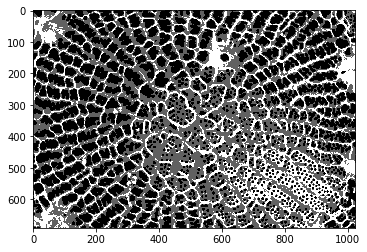

In [21]:
maximum= np.amax(newnewimg)
minimum=np.amin(newnewimg)

newimg[np.where(newnewimg == [maximum])] = [255]
newimg[np.where(newnewimg == [minimum])] = [0]
plt.imshow(newnewimg, cmap='gray')

In [22]:
ablur = cv2.blur(newnewimg,(20, 20))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,33,4) 

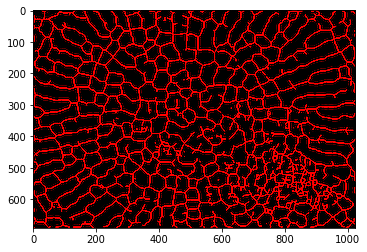

In [23]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

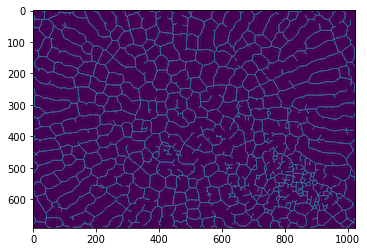

In [24]:
from skimage.morphology import remove_small_objects
cleanskel=remove_small_objects(adaptiveskeleton, min_size=70, connectivity=3)
plot = plt.subplot()
plot.imshow(cleanskel, interpolation='sinc') 

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


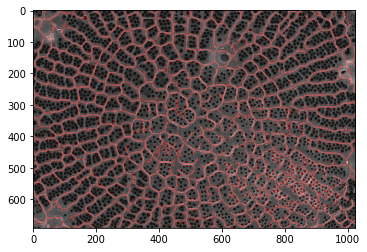

In [25]:
imgplot2 = plt.imshow(img, cmap='gray', alpha= .9)

ax2 = plt.subplot()
ax2.imshow(cleanskel, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()